<a href="https://colab.research.google.com/github/ubsuny/PHY386/blob/Homework2025/2025/HW/rahatalberuni/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4: Python Types & Quantum States (42 pts)

## Learning Outcomes
1. Understand Python type annotations for function arguments and returns
2. Create quantum states using QuTiP's type-checked operations and learning how to use a new python library
3. Generate photonic circuits using Strawberry Fields with AI assistance

## Understanding Data Types and Type Checking in Python
### What is a standard Data Type?

A **data type** is a classification of data that determines the kind of value a variable can hold and what operations can be performed on it. In Python, data types are classes, and variables are instances of these classes. Python supports various built-in data types, including:

- **Numeric types**: `int`, `float`, `complex`  
  (e.g., photon numbers, probabilities, amplitudes)
- **Sequence types**: `list`, `tuple`, `range`  
  (e.g., lists of quantum states)
- **Text type**: `str`  
  (e.g., state labels or descriptions)
- **Mapping type**: `dict`  
  (e.g., parameter dictionaries for circuits)
- **Set types**: `set`, `frozenset`
- **Boolean type**: `bool`  
  (e.g., flags for conditions)
- **Binary types**: `bytes`, `bytearray`, `memoryview`
- **None type**: `NoneType`

Each data type has specific characteristics and behaviors, allowing programmers to work with different kinds of data efficiently.

---

### What is Type Checking?

**Type checking** is the process of verifying whether operations in a program comply with the type rules of the programming language. It ensures that variables are used consistently with their declared or inferred types, helping to prevent errors and improve code reliability.

There are two main forms of type checking:

1. **Static Type Checking**:
   - Performed at compile-time (before running the program).
   - Detects type-related errors early in development.
   - Python supports static type checking using **type hints** and external tools like `mypy`.

2. **Dynamic Type Checking**:
   - Occurs at runtime (while the program is running).
   - Python primarily uses dynamic type checking, allowing flexibility but catching errors later.


Type checking helps you:
- Catch bugs early.
- Make your code easier to understand.
- Improve collaboration by clearly defining how functions should be used.

## Part 0: Google Colab Setup for Type Checking
### Step 1: Enable Built-in Type Checking
Google Colab has a built-in type checker (Pyright) that underlines type errors in red. To enable it:
1. Go to the **Tools** menu in Colab.
2. Select **Settings**.
3. Click on the **Editor** tab.
4. Scroll down to **Code diagnostics** and select **Syntax and type checking**.

Once enabled:
- Type errors will be underlined in red.
- Hover over the error to see detailed messages.

### Step 2: Install External Type Checkers (Optional)
For more advanced type checking, install `nbqa` and `mypy`:

In [ ]:
!pip install -q nbqa mypy

To run type checks on your entire notebook:

In [ ]:
!nbqa mypy HW3.ipynb

## Part 1: Python Type Annotations

## Type Annotations in Python

Type annotations in Python provide a way to specify the expected types of variables, function parameters, and return values. They serve as hints to developers and tools, but do not affect the runtime behavior of the code. Here's how to use type annotations:

### Basic Syntax

- For variables: `variable_name: type = value`
- For functions:
  ```python
  def function_name(param1: type1, param2: type2) -> return_type:
      function body
  ```

---

### Why Use Type Annotations in Python?

Python allows you to add **type annotations**, which are optional hints about the expected types of variables, function arguments, and return values. While Python doesn't enforce these annotations at runtime, tools like `mypy` or Colab's built-in type checker can analyze your code for consistency.

**Example error prevention:**
```python
# Without annotations
def bad_function(x):
    return x + 1

bad_function("2")  # Returns "21" (string concatenation)!

# With annotations
def good_function(x: int) -> int:
    return x + 1

bad_function("2")  # Type checkers warn about string input
```

#### Examples:

1. Variable annotations:

In [ ]:
name: str = "Alice"
distance: int = 30
print("var: {}, type: {}".format(distance, type(distance)))

2. Function annotations:

In [ ]:
def encryption_type(name: str) -> str:
    """ annotation example for functions """
    return f"Encryption: {name}"
print(encryption_type("Caesar Cipher"))

In [ ]:
def add_numbers(a: int, b: int) -> int:
    return a + b

add_numbers(2, 3)  # Works fine
add_numbers("2", 3)  # Type checker will flag this as an error!

3. Complex types:
```python
from typing import List, Dict
def process_data(items: List[int]) -> Dict[str, int]:
    # Function implementation
```


Type annotations help improve code readability, catch potential errors early, and enable better tooling support for IDEs and static type checkers like mypy.

## Quantum Concepts in This Assignment

### What is a Quantum State?
A **quantum state** is a mathematical representation of a quantum system. In a two-level system (qubit), a state $|\psi\rangle$ can be written as:
$$ |\psi\rangle = \alpha |0\rangle + \beta |1\rangle $$
where $\alpha$ and $\beta$ are complex numbers representing probability amplitudes.

### Superposition and Measurement
- **Superposition**: A qubit can be in a mix of $|0\rangle$ and $|1\rangle$ states until measured.
- **Measurement**: When measured, the qubit collapses to either $|0\rangle$ or $|1\rangle$ with probabilities $\alpha|^2$ and $|\beta|^2$.

### Entanglement
When two qubits are **entangled**, the state of one qubit depends on the state of the other, even if they are far apart. A common entangled state is the Bell state:
$$|\Phi^+\rangle = \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle) $$


### QuTiP Data Types

QuTiP (Quantum Toolbox in Python) introduces specialized data types for quantum science, primarily centered around the `Qobj` (Quantum Object) class. Here's an overview of the key QuTiP data types:

1. **Qobj**: The fundamental data type in QuTiP, representing [quantum operators](https://en.wikipedia.org/wiki/Operator_(physics)) and [state vectors](https://en.wikipedia.org/wiki/Quantum_state). It has the following characteristics:
   - Implements mathematical operations (+, -, *) between Qobj instances
   - Can represent [kets](https://en.wikipedia.org/wiki/Bra%E2%80%93ket_notation), [bras](https://en.wikipedia.org/wiki/Bra%E2%80%93ket_notation), operators, and [superoperators](https://en.wikipedia.org/wiki/Superoperator)
   - Stores data in various formats (e.g., dense or sparse matrices)

2. **DimensionLike**: Represents the dimensions of [quantum systems](https://en.wikipedia.org/wiki/Quantum_system), crucial for [tensor products](https://en.wikipedia.org/wiki/Tensor_product).

3. **ArrayLike**: Used for input data in vector/matrix representation of quantum objects.

4. **ket**: A column vector representing a [quantum state](https://en.wikipedia.org/wiki/Quantum_state).

5. **bra**: A row vector, the [Hermitian conjugate](https://en.wikipedia.org/wiki/Hermitian_adjoint) of a ket.

6. **oper**: A matrix representing a quantum operator.

7. **super**: A superoperator, used in quantum operations on [density matrices](https://en.wikipedia.org/wiki/Density_matrix).

8. **eseries**: Represents exponential-series expansion of time-dependent quantum objects.

QuTiP also supports various data layer types for efficient storage and computation:

- **Dense**: For dense matrix representations
- **CSR**: Compressed Sparse Row format for sparse matrices
- **Dia**: Diagonal storage format for diagonal matrices

These specialized types allow QuTiP to efficiently handle quantum computations, enabling operations like:
- Creating quantum states (e.g., [Fock states](https://en.wikipedia.org/wiki/Fock_state), [coherent states](https://en.wikipedia.org/wiki/Coherent_state))
- Performing [quantum measurements](https://en.wikipedia.org/wiki/Measurement_in_quantum_mechanics)
- Simulating [quantum dynamics](https://en.wikipedia.org/wiki/Quantum_dynamics)

By using these types, QuTiP provides a powerful framework for [quantum computing](https://en.wikipedia.org/wiki/Quantum_computing) simulations and calculations.


## Exercise 1 - Debugging Type Errors (14 pts)  
Fix the type errors in this code by referring to the [qutip documentation](https://qutip.org/docs/4.0.2/index.html) which data types are required :

In [4]:
!pip install qutip
import qutip


  Using cached qutip-5.1.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.1/30.1 MB 38.7 MB/s eta 0:00:00


In [5]:
def photon_count(state: qutip.Qobj) -> int:
    """
    Computes the expectation value of the photon number operator ⟨n⟩.

    Parameters:
        state (qutip.Qobj): Quantum state.

    Returns:
        ???: Photon number expectation value.
    """
    return qutip.expect(qutip.num(10), state)  # Returns float!

In [ ]:
photon_count(qutip.coherent(10, 1))

In [ ]:
def create_fock_state(n: float, dims: int) -> qutip.Qobj:
    """
    Type enforcement prevents:
    create_fock_state(2.5, 10)  # Error: n must be integer!
    """
    return qutip.fock(dims, n)

In [ ]:
create_fock_state(2.5, 10)

In [ ]:
def create_coherent_state(alpha: complex, dimension: float) -> int:
    """
    Creates a coherent state |α⟩ using QuTiP.

    Parameters:
        alpha (complex): Complex displacement parameter.
        dimension (int): Hilbert space size.

    Returns:
        qutip.Qobj: The coherent state |α⟩.
    """
    return qutip.coherent(dimension, alpha)

def photon_number_expectation(state: string) -> Qobj:
    """
    Computes the expectation value of the photon number operator ⟨n⟩.

    Parameters:
        state (???): Quantum state.

    Returns:
        ???: Photon number expectation value.
    """
    return qutip.expect(qutip.num(state.dims), state)

## Exercise 2: Quantum States in QuTiP (14 points)

### Exercise 2.1: Creating Fock States
Create the Fock state $|n\rangle$ for $n=0, 1, 2$ using QuTiP and plot the corresponding wavefunctions.

Hints: Use [`fock`](https://qutip.org/docs/4.0.2/apidoc/functions.html?highlight=fock#qutip.states.fock) to generate number states and [`state.full().flatten()**2`](https://qutip.org/docs/4.0.2/apidoc/classes.html?highlight=full#Qobj.full) in a bar plot for plotting


In [7]:
import matplotlib.pyplot as plt
import numpy as np

f0 = qutip.fock(10, 0)

plt.bar([0],np.aps(f0.full().flatten))**2

AttributeError: module 'numpy' has no attribute 'aps'

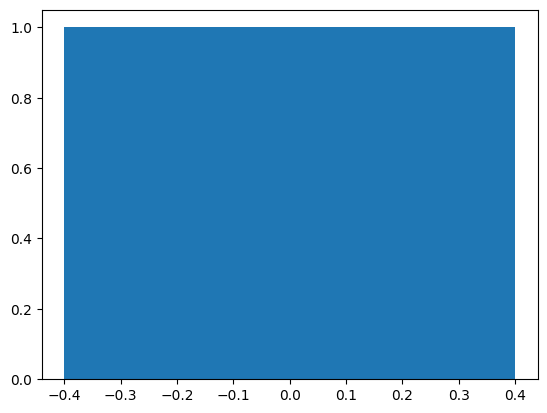

In [13]:
import matplotlib.pyplot as plt
import numpy as np

f0 = qutip.fock(10, 0)

# Square the values before plotting
bar_heights = np.abs(f0.full().flatten())**2
plt.bar([0], bar_heights)
plt.show() # Add this line to display the plot

### Exercise 2.2: Creating Coherent States
Generate a coherent state using the function from Excercise 1 with $\alpha = 1.5$ and visualize its Wigner function using matplotlibs `contourf` and the following example code:

```python
# Plot Wigner function
x = np.linspace(-5, 5, 200)
y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x, y)
Z = wigner(coherent_state, x, y)
```

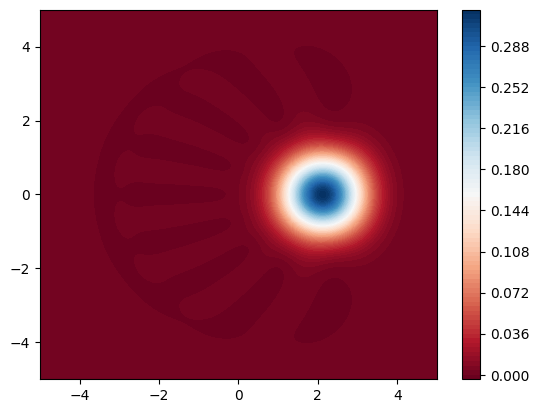

In [11]:
coherent_state = qutip.coherent(10, 1.5)
x = np.linspace(-5, 5, 200)
y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x, y)
Z = qutip.wigner(coherent_state, x, y)
plt.contourf(X, Y, Z, 100, cmap='RdBu')
plt.colorbar()


### Exercise 2.3: Creating Squeezed Vacuum States
Create and visualize a squeezed vacuum state with a squeezing parameter of 1.0 using [`squeeze`](https://qutip.org/docs/4.0.2/apidoc/functions.html?highlight=squeeze#qutip.operators.squeeze).

1. Generate a so called vacuum Fock state with a Hilbert Dimension of your chaice (e.g. 10) and a number state of 0
2. Generate a product state (*) of the squeeze state (Careful: same Hilbert dimension!) and the squeezing parameter $r$ with the vacuum Fock state.
3. Now do the same plotting as in Ex 2.2




## Exercise 3: Interactive Quantum Circuit Prompt (14 points)

### Objective

In this exercise, you will interact with any LLM to design and implement a quantum photonic circuit using a real quantum computer (Strawberry Fields). You will be guided through an interactive prompt that helps you define a quantum problem and generate Python code to solve it.

### Instructions

1. **Use the Provided Interactive Prompt**: Copy and paste the following structured prompt into ChatGPT. This will guide you through the process of creating a quantum photonic circuit tailored to a problem of your choice.

   **Interactive Prompt:**
   
   ```
   I want to design a quantum photonic circuit using Strawberry Fields in Python. Please guide me step by step by asking interactive questions to define the circuit based on my requirements. Here’s how I’d like you to proceed:
   
   1. Ask me what type of quantum problem I want to solve (e.g., quantum teleportation, Gaussian boson sampling, entanglement generation).
   2. Help me choose the number of modes and photon states required for the circuit.
   3. Assist me in selecting quantum operations (e.g., squeezing, displacement, beamsplitters, phase shifts, Kerr interaction).
   4. Guide me in setting up appropriate measurements (e.g., homodyne, photon counting, heterodyne).
   5. Once all parameters are determined, generate the complete Strawberry Fields Python code for the circuit.
   6. Include a section to visualize the output state or measurement results using Matplotlib or QuTiP.
   
   Please guide me interactively through each step, ensuring that I understand the choices and their implications. After the final code is generated, provide an explanation of its functionality.
   ```

2. **Follow the Interaction**: Engage with ChatGPT as it asks you about the circuit details. Answer its questions carefully to shape the circuit according to your learning objectives.

3. **Analyze and Run the Generated Code**: Copy the final Python code provided by ChatGPT and run it in your Python environment. Verify its correctness and functionality.

4. **Modify and Improve the Prompt**: Make sure that the genrated code uses type annotations as in Excercise 1, refine the prompt and rerun the interaction to improve the generated circuit and its explanations.

5. **Submit Your Work:**
   - Include the final refined prompt you used.
   - Provide the complete generated Python code.
   - Document the results and any modifications you made to improve the circuit.
   - Explain your learning experience from this interactive process.


